<a href="https://colab.research.google.com/github/julianVelandia/RedesNeuronalesConPyTorch/blob/master/redes-neuronales/3_2_Redes_neuronales_con_PyTorch_FULL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales con PyTorch

## Introducción a las Redes Neuronales Básicas

### Concepto de una Neurona
Una neurona básica toma varias entradas, las combina utilizando pesos, les suma un sesgo y aplica una función de activación para producir una salida.

# Función Sigmoide
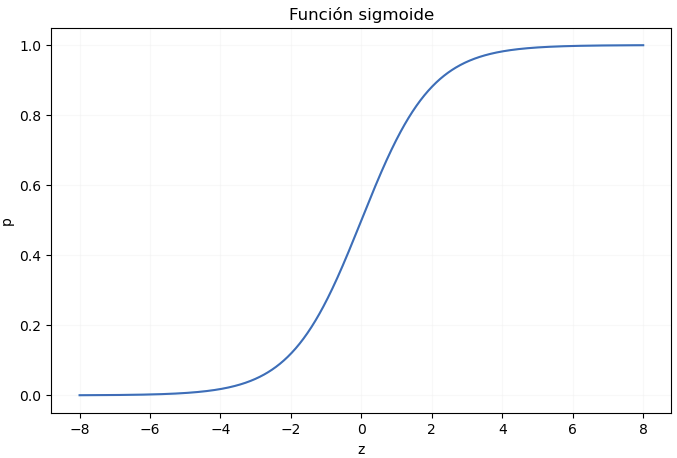

### Implementación Manual de una Neurona en Python

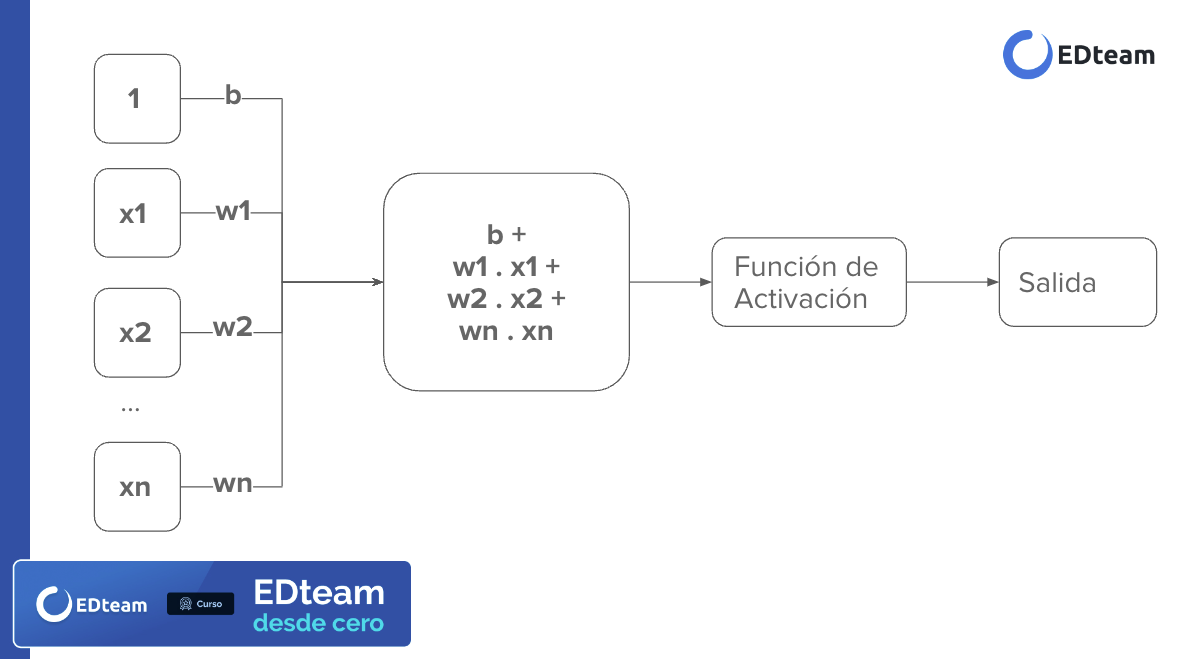

In [ ]:
import numpy as np

def sigmoid(x):
    """Applies the sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        """Initializes a neuron with given weights and bias."""
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        """Computes the output of the neuron for given inputs."""
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

weights = np.array([1, 1])
bias = 0.0
n = Neuron(weights, bias)
output = n.feedforward(np.array([1, 1]))
print(f"Output: {output}\n")

Output: 0.8807970779778823



## Redes Neuronales con Múltiples Neuronas

## Redes Neuronales Multicapa

### Arquitectura de una Red Neuronal Multicapa
Una red neuronal multicapa consta de múltiples capas de neuronas, donde la salida de una capa se convierte en la entrada de la siguiente.

### Implementación de una Red Neuronal Multicapa en PyTorch

In [ ]:
import torch
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self):
        """Initializes a simple neural network with 3 layers."""
        super(SimpleNN, self).__init__()
        # 2 entradas y 3 salidas
        self.fc1 = nn.Linear(2, 3)
        # 3 entradas y 3 salidas
        self.fc2 = nn.Linear(3, 3)
        # 3 entradas y una salida
        self.fc3 = nn.Linear(3, 1)

    def forward(self, x):
        """Defines the forward pass of the network."""
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

model = SimpleNN()
inputs = torch.tensor([1.0, 2.0])
output = model(inputs)
print(f"Multilayer Network Output: {output}\n")

Multilayer Network Output: tensor([0.4954], grad_fn=<SigmoidBackward0>)



## Entrenamiento de Redes Neuronales en PyTorch

### Introducción al Entrenamiento
El entrenamiento de una red neuronal implica ajustar sus pesos para minimizar una función de pérdida utilizando un conjunto de datos de entrenamiento.

### Ejemplo de Entrenamiento con PyTorch

In [ ]:
import torch.optim as optim
import random

# Datos
def generate_random_data(num_samples, threshold=0.25):
    data = []
    labels = []
    for _ in range(num_samples):
        x1 = random.uniform(0, 1)
        x2 = random.uniform(0, 1)
        data.append([x1, x2])
        distance = abs(x1 - x2)
        if distance < threshold:
            labels.append([0.0])  # Si la distancia es menor que el umbral, label es 0
        else:
            labels.append([1.0])  # Si la distancia es mayor o igual al umbral, label es 1
    return torch.tensor(data), torch.tensor(labels)


train_data, train_labels = generate_random_data(num_samples=1000, threshold=0.25)
validation_data, validation_labels = generate_random_data(num_samples=200, threshold=0.25)


model = SimpleNN()
# función de pérdida: Error Cuadrático Medio
criterion = nn.MSELoss()
# Gradiente Descendente Estocástico
optimizer = optim.SGD(model.parameters(), lr=0.1)


train_losses = []
validation_losses = []


epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(train_data)
    loss = criterion(outputs, train_labels)
    loss.backward()
    optimizer.step()

    # Almacenar la pérdida en el conjunto de entrenamiento
    train_losses.append(loss.item())

    # Evaluar la pérdida en el conjunto de validación
    with torch.no_grad():
        validation_outputs = model(validation_data)
        validation_loss = criterion(validation_outputs, validation_labels)
        validation_losses.append(validation_loss.item())


prediction = model(torch.tensor([0.1, 0.05] ))
print(f"Prediction for new data: {prediction}\n")

Prediction for new data: tensor([0.4912], grad_fn=<SigmoidBackward0>)



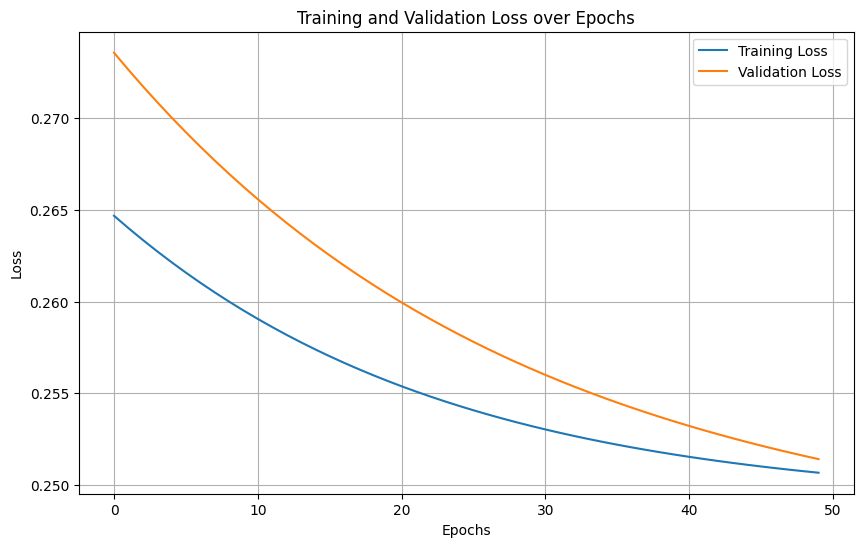

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), validation_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()